In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys

assert sys.version_info >= (3, 7)

In [ ]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

import sys
# 코랩의 경우 나눔 폰트를 설치합니다.
if 'google.colab' in sys.modules:
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

# 나눔 폰트를 사용합니다.
import matplotlib

matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

In [ ]:
!pip install pandas scikit-learn

import pandas as pd
import numpy as np

특성 엔지니어링


In [ ]:
# CSV 파일 경로 지정
data_path = '/content/drive/MyDrive/0-ml-team-project-pm-data-main/processed_data.csv'
data = pd.read_csv(data_path)

# 데이터 확인
print(data.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                                   title   type                     genres  \
0                      The Fifth Element  movie  Action, Adventure, Sci-Fi   
1                      Kill Bill: Vol. 1  movie    Action, Crime, Thriller   
2                                Jarhead  movie      Biography, Drama, War   
3                             Unforgiven  movie             Drama, Western   
4  Eternal Sunshine of the Spotless Mind  movie     Drama, Romance, Sci-Fi   

   releaseYear     imdbId  imdbAverageRating  imdbNumVotes  \
0         1997  tt0119116                7.6        517963   
1         2003  tt0266697                8.2       1224222   
2         2005  tt0418763                7.0        212031   
3         1992  tt0105695                8.2        444769   
4         2004  tt0338013                8.3       1107727   

                             

K-평균 군집화

In [ ]:
# 필요한 컬럼 선택 (예: 장르, 연도, 평점)
features = data[['genres', 'releaseYear', 'imdbAverageRating']]

# 범주형 변수 처리 (예: One-Hot Encoding)
features = pd.get_dummies(features, drop_first=True)

# 결과 확인
print(features.head())


   releaseYear  imdbAverageRating  genres_Action, Adventure  \
0         1997                7.6                     False   
1         2003                8.2                     False   
2         2005                7.0                     False   
3         1992                8.2                     False   
4         2004                8.3                     False   

   genres_Action, Adventure, Animation  genres_Action, Adventure, Biography  \
0                                False                                False   
1                                False                                False   
2                                False                                False   
3                                False                                False   
4                                False                                False   

   genres_Action, Adventure, Comedy  genres_Action, Adventure, Crime  \
0                             False                            False   
1 

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 결과 확인
print("표준화된 데이터 예시:")
print(features_scaled[:5])


표준화된 데이터 예시:
[[-1.05701338  1.09919878 -0.02923449 ... -0.01033209 -0.01265451
  -0.01633778]
 [-0.64918446  1.64790743 -0.02923449 ... -0.01033209 -0.01265451
  -0.01633778]
 [-0.51324149  0.55049014 -0.02923449 ... -0.01033209 -0.01265451
  -0.01633778]
 [-1.39687081  1.64790743 -0.02923449 ... -0.01033209 -0.01265451
  -0.01633778]
 [-0.58121298  1.73935887 -0.02923449 ... -0.01033209 -0.01265451
  -0.01633778]]


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# K-means 모델 생성
kmeans = KMeans(n_clusters=5, random_state=42)
data['cluster'] = kmeans.fit_predict(features_scaled)

# 클러스터링 결과 확인
print(data[['title', 'cluster']].head())

# 실루엣 점수 계산
silhouette_avg = silhouette_score(features_scaled, data['cluster'])
print(f'Silhouette Score: {silhouette_avg}')


                                   title  cluster
0                      The Fifth Element        3
1                      Kill Bill: Vol. 1        3
2                                Jarhead        3
3                             Unforgiven        3
4  Eternal Sunshine of the Spotless Mind        3
Silhouette Score: -0.12874548447475528


점수가
0.5 = 좋음

---

0.3 = 적당

---


0.1 = 좋지않음




클러스터 품질평가


In [ ]:
from sklearn.metrics import silhouette_score

# Silhouette Score 계산
silhouette_avg = silhouette_score(features_scaled, data['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: -0.12874548447475528


In [ ]:
# 클러스터 중심 확인
print("Cluster Centers:")
print(kmeans.cluster_centers_)

Cluster Centers:
[[ 5.31577349e-01  5.47877237e-01 -2.92344865e-02 ... -1.03320893e-02
  -1.26545111e-02 -1.63377756e-02]
 [ 9.92571203e-02 -7.19668766e-01 -2.92344865e-02 ... -1.03320893e-02
  -1.26545111e-02 -1.63377756e-02]
 [ 1.95021392e-01 -8.05248069e-02 -2.92344865e-02 ... -1.03320893e-02
  -1.26545111e-02 -1.63377756e-02]
 [-2.78606792e-03  1.97498015e-03  4.82139852e-04 ...  1.70398477e-04
   2.08700231e-04  2.69445223e-04]
 [ 5.46215553e-02  2.18255154e-01 -2.92344865e-02 ... -1.03320893e-02
  -1.26545111e-02 -1.63377756e-02]]


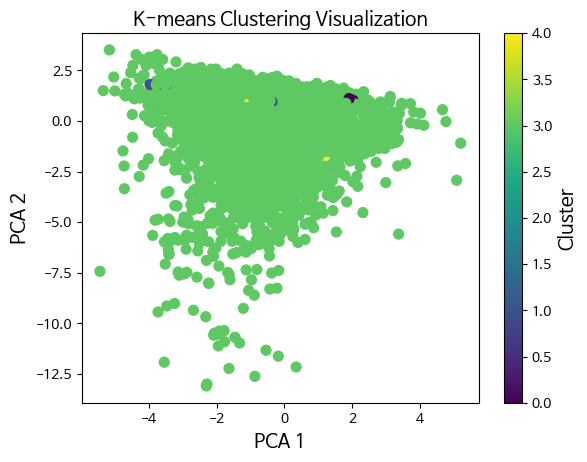

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA로 2차원 데이터로 축소
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features_scaled)

# 클러스터 시각화
plt.scatter(features_2d[:, 0], features_2d[:, 1], c=data['cluster'], cmap='viridis', s=50)
plt.title('K-means Clustering Visualization')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()

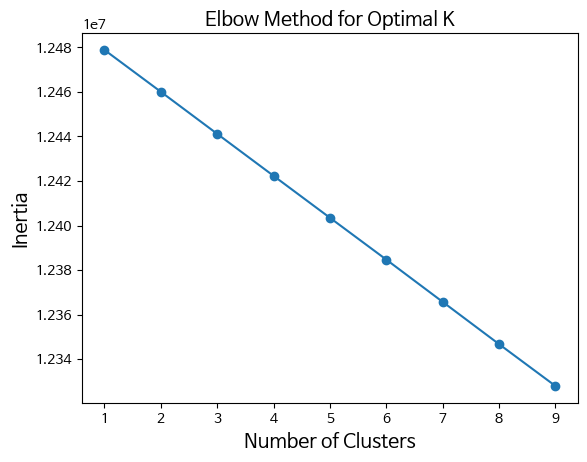

In [ ]:
# 엘보우 방법을 사용한 최적의 클러스터 개수 탐색
inertia_list = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia_list.append(kmeans.inertia_)

# 그래프 그리기
plt.plot(range(1, 10), inertia_list, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
for k in range(2, 10):  # K 값을 2~9로 테스트
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(features_scaled)
    score = silhouette_score(features_scaled, clusters)
    print(f"K={k}, Silhouette Score: {score}")

K=2, Silhouette Score: 0.1865247498229484
K=3, Silhouette Score: -0.11022612311068462
K=4, Silhouette Score: -0.13298764740736466
K=5, Silhouette Score: -0.12874548447475528
K=6, Silhouette Score: -0.12622459168497685
K=7, Silhouette Score: -0.21334206891305643
K=8, Silhouette Score: -0.2606188558380875
K=9, Silhouette Score: -0.25837280532468737
